In [1]:
#project: p9
#submitter: lin383 
#partner: ylin363

In [2]:
import os, json, csv

In [3]:
%matplotlib inline

In [4]:
import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [5]:
os.listdir(".")

['main.ipynb',
 'main_andy (1).ipynb',
 'fruit',
 '.DS_Store',
 'result.json',
 'main_andy.ipynb',
 'test.py',
 'Lab P9a.ipynb',
 'cs-301-test.ipynb',
 '.ipynb_checkpoints',
 'Lab P9b.ipynb',
 'data',
 'p9Lab note.rtf',
 'lecture 11:8 note']

In [6]:
#Q1: What are the names of the files present in the data directory?
file_names = os.listdir("data")
sorted_file_names = sorted(file_names, reverse = True)
sorted_file_names

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json']

In [7]:
#Q2: What are the paths of all the files in the data directory?
file_path = []
for i in range(len(sorted_file_names)):
    file_path.append(os.path.join("data", sorted_file_names[i]))
file_path

['data/sample_reviews.json',
 'data/sample_reviews.csv',
 'data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv',
 'data/products.json']

In [8]:
#Q3: What are the paths of all the CSV files present in data directory?
csv_file = []
for file in file_path:
    if "csv" in file:
        csv_file.append(file)
csv_file

['data/sample_reviews.csv',
 'data/review5.csv',
 'data/review4.csv',
 'data/review3.csv',
 'data/review2.csv',
 'data/review1.csv']

In [9]:
#Q4: What are the paths of all the files present in data directory, that begin with the phrase 'review'?
review_file = []
for file in file_path:
    if file[5:].startswith("review"):
        review_file.append(file)
review_file

['data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv']

In [10]:
def open_json(filename):
    f = open(os.path.join("data",filename), encoding = "utf-8")
    reader = json.load(f)
    f.close()
    return reader

In [11]:
#Q5: What are the products in products.json?
open_json("products.json")

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [12]:
def open_csv(filename):
    csv_list = []
    f = open(os.path.join("data", filename), encoding = "utf-8")
    reader = csv.DictReader(f)
    for row in reader:
        csv_list.append(row)
    f.close()
    return csv_list

In [13]:
filenames = []
for file in sorted_file_names:
    if "csv" in file:
        filenames.append(file)

def csv_find_review(review_header, review_id):
    text = None
    for file in filenames:
        review = open_csv(file)
        for row in review:
            if row['review id'] == review_id:
                text = row[review_header]
    return text

In [14]:
#Q6: What is the review text of review with id 1410?
csv_find_review("review text", "1410")

'It does what it is suppose to. No problems with it...'

In [15]:
#Q7: What is the review text of review with id 69899?
csv_find_review("review text", "69899")

'I hate amazon app store. Nothing good in there. The tablet is too slow for what I do... it is good for reading only....'

In [16]:
#Q8: What is the review title of review id 28013?
csv_find_review("review title", "28013")

'Perfection'

In [17]:
#Q9: What file contained the review with that id?
def csv_find_review(review_id):
    text = None
    for file in filenames:
        review = open_csv(file)
        for row in review:
            if row['review id'] == review_id:
                text = file
    return text
csv_find_review("28013")

'review3.csv'

In [18]:
#Q10: What is the data stored in sample_reviews.json?
open_json("sample_reviews.json")

{'10101': ['Mikey123456789', 'B00QFQRELG'],
 '99904': ['diamond', 'B00QFQRELG'],
 '89604': ['Pat91', 'B00QFQRELG'],
 '58704': ['Frank', 'B00QFQRELG'],
 '38104': ['LADYD92', 'B00QFQRELG']}

In [19]:
from collections import namedtuple

In [20]:
Review = namedtuple("Review", ["id", "username","asin", "title", "text", "rating", "do_recommend", "num_helpful", "date"])

In [21]:
def get_reviews(csv_filenames, json_filenames):
    csv_file = open_csv(csv_filenames)
    json_file = open_json(json_filenames)
    list_review = []
    # loop over the csv_file
    for csv_row in csv_file:
        # set a boolean to check if missing data exists
        missing_data_check = False
        # loop over the header in csv_row to check if data are missing
        for header in csv_row:
            # if the csv_row's data corresponding to the header is None, then the data is missing and the check should be True
            if csv_row[header] == None or csv_row[header] == '':
                missing_data_check = True
        # if the check is True, skip the whole row
        if missing_data_check == True:
            continue
        # else, append the review object to a list
        boolean = False
        if csv_row["review do_recommend"] == "True":
            boolean = True
        review = Review(int(csv_row["review id"]),
                        json_file[csv_row["review id"]][0],
                        json_file[csv_row["review id"]][1],
                        csv_row["review title"], csv_row["review text"],
                        int(csv_row["review rating"]),
                        boolean,
                        int(csv_row["review num_helpful"]),
                        csv_row["review date"])
        list_review.append(review)
    return list_review

In [22]:
#Q11: What is produced by your function get_reviews('sample_reviews.csv', 'sample_reviews.json')?
sample_reviews = get_reviews('sample_reviews.csv', 'sample_reviews.json')
sample_reviews

[Review(id=10101, username='Mikey123456789', asin='B00QFQRELG', title='A charger', text='It seems to work just like any other usb plug in charger.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-02'),
 Review(id=99904, username='diamond', asin='B00QFQRELG', title='amazon power fast usb charger', text='got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire', rating=5, do_recommend=True, num_helpful=2, date='2016-06-03'),
 Review(id=89604, username='Pat91', asin='B00QFQRELG', title='Amazon powerfast wall charger', text='Best kindle charger ever. Took 30 minutes to being my kindle back to life.', rating=5, do_recommend=True, num_helpful=0, date='2016-11-21'),
 Review(id=58704, username='Frank', asin='B00QFQRELG', title='correct plug for kindle', text='Quickly charges kindle so son can use it. Worked great right out of the package', rating=5, do_recommend=True, num_helpful=0, date='2016-10-14'),


In [23]:
#Q12: What are the first ten Review objects in the list produced by get_reviews('review1.csv', 'review1.json')?
review1 = get_reviews('review1.csv', 'review1.json')[:10]
review1

[Review(id=10101, username='Mikey123456789', asin='B00QFQRELG', title='A charger', text='It seems to work just like any other usb plug in charger.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-02'),
 Review(id=99904, username='diamond', asin='B00QFQRELG', title='amazon power fast usb charger', text='got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire', rating=5, do_recommend=True, num_helpful=2, date='2016-06-03'),
 Review(id=89604, username='Pat91', asin='B00QFQRELG', title='Amazon powerfast wall charger', text='Best kindle charger ever. Took 30 minutes to being my kindle back to life.', rating=5, do_recommend=True, num_helpful=0, date='2016-11-21'),
 Review(id=58704, username='Frank', asin='B00QFQRELG', title='correct plug for kindle', text='Quickly charges kindle so son can use it. Worked great right out of the package', rating=5, do_recommend=True, num_helpful=0, date='2016-10-14'),


In [24]:
#Q13: What are the last ten Review objects in the list produced by get_reviews('review2.csv', 'review2.json')?
review2 = get_reviews('review2.csv', 'review2.json')[-10:]
review2

[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [25]:
# this cell will combine the whole review files together (review1-5.csv, review1-5.json)

# list of sorted file names
sorted_file_names = sorted(sorted_file_names, reverse = False)

# keep only review files
review_file = []
for file in sorted_file_names:
    if "review" in file:
        review_file.append(file)
        
# create a dict with key = file type
review_file_dict = {}
for file in review_file:
    if "json" in file:
        if "json" not in review_file_dict:
            review_file_dict["json"] = []
        review_file_dict["json"].append(file)
    if "csv" in file:
        if "csv" not in review_file_dict:
            review_file_dict["csv"] = []
        review_file_dict["csv"].append(file)
        
# combine entire data to a list
entire_review_object = []
# list that contains broken json file
broken_file = []
for i in range(len(review_file_dict["csv"])):
    # not to combine sample file
    if "sample" in review_file_dict["csv"][i]:
        continue
    try:
        review = get_reviews(review_file_dict["csv"][i], review_file_dict["json"][i])
        entire_review_object.extend(review)
    except:
        broken_file.append([review_file_dict["csv"][i], review_file_dict["json"][i]])
        continue

In [26]:
def find_review_by_id(the_id):
    review_object = None
    for review in entire_review_object:
        if review.id == the_id:
            review_object = review
    return review_object

In [27]:
#Q14: What is the Review object with review id 84713?
find_review_by_id(84713)

Review(id=84713, username='mmolly1', asin='B01AHB9CN2', title='Great product', text='This product is very user friendly and it is very lightweight', rating=5, do_recommend=True, num_helpful=0, date='2017-01-08')

In [28]:
#Q15: What is the Review object with review id 42931?
find_review_by_id(42931)

Review(id=42931, username='tbistone', asin='B01BH83OOM', title='Amazing', text='I literally use this thing every single day. Love it.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-20')

In [29]:
#Q16: List the first ten Review objects in the entire dataset, sorted by increasing order of their review ids.

# reference: https://stackoverflow.com/a/54123931/9340769
sorted(entire_review_object, key = Review.id.fget)[:10]

[Review(id=74, username='Wayne', asin='B01AHB9CN2', title='Kindle upgrade', text='Gave this to my wife for Christmas. Upgraded from the original Kindle. She thoroughly enjoys it.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-31'),
 Review(id=82, username='KKLORRAINE', asin='B01AHB9CN2', title='Good', text='Great for reading and Netflix. Fits nice in purse. Good price.', rating=4, do_recommend=True, num_helpful=0, date='2017-04-07'),
 Review(id=110, username='nell', asin='B00IOY8XWQ', title='I love it', text='Prefect for all reading conditions and environments. I take it everywhere.', rating=5, do_recommend=True, num_helpful=0, date='2016-07-09'),
 Review(id=122, username='apple21man', asin='B01BH83OOM', title='A great assistant', text='It works well it takes time for it to know your vocabulary', rating=5, do_recommend=True, num_helpful=0, date='2017-01-23'),
 Review(id=247, username='rockydon1', asin='B018Y229OU', title='great', text='The Kindle fire is a great product. W

In [30]:
# For this last section, we will now try to combine the data we have stored in the Review objects 
# with the data from products.json.
products = open_json("products.json")
products

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [31]:
def find_review_count(text):
    wanted_key = None
    for key in products:
        if products[key] == text:
            wanted_key = key
    count = 0
    for reviews in entire_review_object:
        if reviews.asin == wanted_key:
            count += 1
    return count

In [32]:
#Q17: Output the number of review objects for the product, "Amazon Tap Smart Assistant Alexa enabled (black) Brand New".
find_review_count("Amazon Tap Smart Assistant Alexa enabled (black) Brand New")


165

In [33]:
#Q18: Output the number of review objects for the product, "All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black".
find_review_count("All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black")

12

In [34]:
#Q19: Find the name of the product with most reviews.
most_count = 0
wanted_key = None
wanted_name = None
for key in products:
    if find_review_count(products[key]) > most_count:
        most_count = find_review_count(products[key])
        wanted_key = key
        wanted_name = products[key]
wanted_name

'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'

In [35]:
#Q20: Find the most helpful review(s) of this product.
review_of_the_product = []
for reviews in entire_review_object:
    if reviews.asin == wanted_key:
        review_of_the_product.append(reviews)
most_helpful_count = 0
most_helpful_review = None
for review in review_of_the_product:
    if review.num_helpful > most_helpful_count:
        most_helpful_count = review.num_helpful
        most_helpful_review = review
most_helpful_review

Review(id=85969, username='Beninkc', asin='B018Y229OU', title='5 star device crippled by amazon', text='This device would be the best possible tablet for the money if it had Google Play. However Amazon chose to block access to it. This took their well made tablet with a beautiful screen and great performance from an amazing value to a waste of money. This is my last amazon branded product.If you use a lot of apps or want specific apps shop for another device.', rating=1, do_recommend=False, num_helpful=20, date='2016-02-14')

In [36]:
# stage 2
from collections import defaultdict

In [37]:
#Q21: How many unique usernames appear in the dataset?
username_list = []
for data in entire_review_object:
    username = data.username
    if username not in username_list:
        username_list.append(username)
len(username_list)

3798

In [38]:
#Q22: Who are the top 30 prolific users in this dataset?
username_dict = defaultdict(int)
for data in entire_review_object:
    username = data.username
    username_dict[username] += 1

sorted_username = sorted(username_dict, key = username_dict.get, reverse = True)
sorted_username_dict = {}
for i in range(30):
    sorted_username_dict[sorted_username[i]] = username_dict[sorted_username[i]]
sorted_username_dict

{'Dave': 5,
 '1234': 4,
 'Missy': 4,
 'Steve': 4,
 'Mike': 4,
 'Angie': 4,
 'Chris': 4,
 'Susan': 4,
 'Frank': 3,
 'Charlie': 3,
 'Susie': 3,
 'Dani': 3,
 'mike': 3,
 'Grandma': 3,
 'Rick': 3,
 'Anonymous': 3,
 'David': 3,
 'Mimi': 3,
 'Bubba': 3,
 'kcladyz': 3,
 'Pete': 3,
 'Kindle': 3,
 'Jojo': 3,
 'Richard': 3,
 'Manny': 3,
 'Josh': 3,
 'Charles': 3,
 'Michael': 3,
 'John': 3,
 'Bill': 3}

In [39]:
#Q23: Who are the users whose comments have been found helpful at least five times?
dict_helpful_review_counts = defaultdict(int) # counts
for data in entire_review_object:
    if data.num_helpful >= 5:
        username = data.username
        dict_helpful_review_counts[username] += data.num_helpful
#convert defaultdict to dict
dict(dict_helpful_review_counts)

{'Stuartc': 8,
 'Earthdog': 27,
 'Ellen': 10,
 'Rodge': 6,
 'Karch': 5,
 'FrankW': 5,
 'Kime': 5,
 'Mark': 5,
 '1Briansapp': 5,
 'trouble': 5,
 'Beninkc': 20,
 'Roberto002007': 7,
 'Dick': 5,
 'CarlosEA': 10,
 'EricO': 7,
 'Junior': 7,
 'TerrieT': 5,
 'LadyEsco702': 8,
 'safissad': 8,
 'Quasimodo': 5,
 'iMax': 5,
 'mysixpack': 6,
 'Deejay': 8,
 'stephfasc22': 5,
 'AshT': 5,
 'fenton': 6}

In [40]:
#Q24: Find the average rating of each product.
products = open_json("products.json")
dict_review_total = defaultdict(int) #stores the total review rating
dict_review_counts = defaultdict(int) #stores review counts as a divider

for data in entire_review_object:
    dict_review_total[products[data.asin]] += data.rating
    dict_review_counts[products[data.asin]] += 1
    
#convert defaultdict to dict
dict_review_total = dict(dict_review_total)
dict_review_counts = dict(dict_review_counts)

dict_review_avg = {} # stores the avg
for product in dict_review_total:
    dict_review_avg[product] = dict_review_total[product] / dict_review_counts[product]
dict_review_avg
    

{'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New': 4.6909090909090905,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping': 5.0,
 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers': 4.666666666666667,
 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish': 5.0,
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case': 4.603448275862069,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black': 4.583333333333333,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,


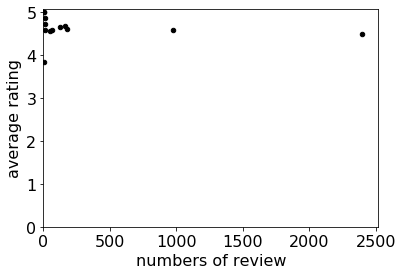

In [41]:
#Q25: What is the relationship between the number of reviews and the average rating of a product?
list_number = list(dict_review_counts.values())
list_rating = list(dict_review_avg.values())
scatter(list_number, list_rating, "numbers of review", "average rating")

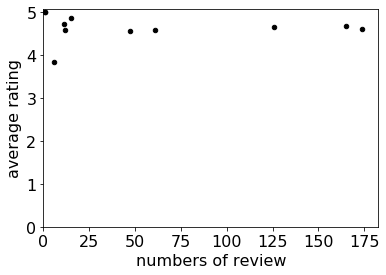

In [42]:
#Q26: Remove the outliers from the last plot.
small_list_number = [number for number in list_number if number <= 175]
small_list_avg = [dict_review_avg[keys] for keys in dict_review_counts if dict_review_counts[keys] < 175]

scatter(small_list_number, small_list_avg, "numbers of review", "average rating")        

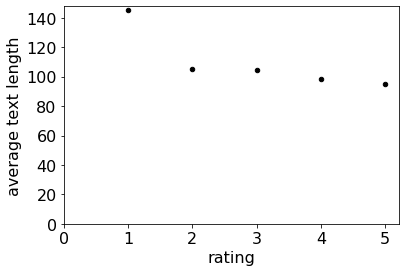

In [43]:
#Q27: What is the relationship between the rating and the average text length?
def bucketize(reviews):
    bucket = defaultdict(list)
    for review in reviews:
        bucket[review.rating].append(review)
    return dict(bucket)

#get the total text length
bucket = bucketize(entire_review_object)
text_length_dict = defaultdict(int)
for rating in bucket:
    for data in bucket[rating]:
        text_length_dict[rating] += len(data.text)
#get the avg text length
avg_length = {}
for rating in bucket:
    avg_length[rating] = text_length_dict[rating] / len(bucket[rating])

scatter(list(avg_length.keys()), list(avg_length.values()), "rating", "average text length")

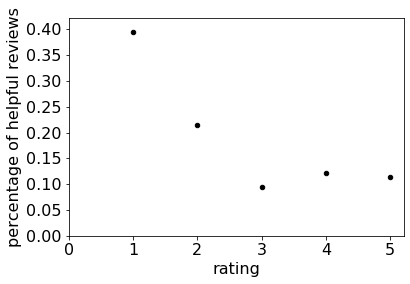

In [44]:
#Q28: What is the relationship between the rating and the likelihood of the review being helpful?

#count the number of helpful review that is greater than 0 and store to helpful_review_dict
helpful_review_dict = defaultdict(int)
for rating in bucket:
    for data in bucket[rating]:
        if data.num_helpful > 0:
            helpful_review_dict[rating] += 1
# get the percentage of (reviews that are found helpful) / (total reviews)
percentage_of_helpful_review_dict = {}
for rating in bucket:
    percentage_of_helpful_review_dict[rating] = helpful_review_dict[rating] / len(bucket[rating])

scatter(list(percentage_of_helpful_review_dict.keys()), list(percentage_of_helpful_review_dict.values()), "rating", "percentage of helpful reviews")


In [45]:
#Q29: What is the average rating of all reviews which recommend the corresponding products?

rating_total = 0 # stores the total of all review rating that has do_recommend to be True
recommend_count = 0 # count do_recommend of all reviews
for rating in bucket:
    for data in bucket[rating]:
        if data.do_recommend == True:
            rating_total += data.rating
            recommend_count += 1
avg = rating_total / recommend_count
avg


4.607549120992761

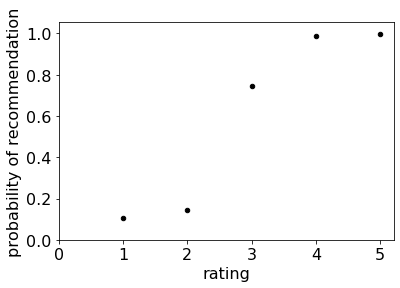

In [46]:
#Q30: What is the relationship between the rating and the likelihood of the product being recommended?

do_recommend_count = defaultdict(int) # numbers of do_recommend count
rating_count = defaultdict(int) # numbers of review
for rating in bucket:
    for data in bucket[rating]:
        if data.do_recommend == True:
            do_recommend_count[rating] += 1
        rating_count[rating] += 1

probability = {} # probability between the rating and the product being recommended
for rating in bucket:
    probability[rating] = do_recommend_count[rating] / rating_count[rating]

scatter(list(probability.keys()), list(probability.values()), "rating", "probability of recommendation")

In [47]:
#Q31: Which words appear most commonly in the text of reviews with rating 5.
#     List only the words that appear more than 1000 times.


def find_occurrence(rating, occurrence, header):
    small_bucket = bucket[rating]
    list_of_words = []
    list_of_words = [getattr(review_object, header).lower().split(" ") for review_object in small_bucket]
    dict_of_words = defaultdict(int)
    for words in list_of_words:
        for word in words:
            dict_of_words[word] += 1
    dict_of_words = dict(dict_of_words)
    
    words_occurrence = {}
    for keyword in dict_of_words:
        if dict_of_words[keyword] > occurrence:
            words_occurrence[keyword] = dict_of_words[keyword]
    return words_occurrence
        
find_occurrence(5, 1000, "text")

{'it': 1286,
 'to': 1442,
 'this': 1016,
 'for': 1800,
 'my': 1146,
 'the': 1740,
 'a': 1134,
 'and': 1818,
 'i': 1317}

In [48]:
#Q32: Which words appear most commonly in the title of reviews with rating 5.
#     List only the words that appear more than 100 times.

find_occurrence(5, 100, "title")

{'a': 143,
 'for': 617,
 'kindle': 142,
 'good': 212,
 'great': 1093,
 'awesome': 108,
 'product': 179,
 'to': 106,
 'price': 149,
 'the': 231,
 'love': 158,
 'it': 137,
 'my': 138,
 'gift': 105,
 'kids': 132,
 'tablet': 681,
 'fire': 104}

In [49]:
#Q33: Which words appear most commonly in the title of reviews with rating 1.
#     List only the words that appear more than once.

find_occurrence(1, 1, "title")

{'disappointed': 2,
 'with': 2,
 'very': 3,
 'good': 2,
 'and': 2,
 'amazon': 5,
 'tablet': 4,
 'not': 8,
 'work': 2,
 '5': 2,
 'for': 2,
 'a': 5,
 'poor': 2,
 'really': 2,
 'does': 2,
 'great': 2,
 'to': 2,
 'use': 2,
 'kindle': 2}

In [50]:
#Q34: Which words appear most commonly in the title of reviews with rating 3.
#     List only the words that appear more than 10 times.

find_occurrence(3, 10, "title")

{'not': 13,
 'great': 37,
 'a': 17,
 'good': 42,
 'ok': 18,
 'tablet': 51,
 'for': 60,
 'the': 18,
 'price': 18}

In [51]:
def list_find_file(filename):
    list_of_file = []
    filepath = os.path.join("broken_file", filename)
    if os.path.isfile(filepath):
        list_of_file.append(filepath)
    else:
        for file in os.listdir(filepath):
            if str(file)[0] == ".":
                continue
            if os.path.isfile(os.path.join(filepath, file)):
                list_of_file.append(os.path.join(filepath, file))
            else:
                # if isdir
                list_of_file.extend(list_find_file(os.path.join(filename, file)))
    
    return sorted(list_of_file, reverse = True)

In [52]:
#Q35: List the paths in the helpful directory of rating5 of broken_file.
list_find_file(os.path.join("rating5", "helpful"))

FileNotFoundError: [Errno 2] No such file or directory: 'broken_file/rating5/helpful'

In [53]:
#Q36: List the paths of all the files in the rating4 directory of broken_file.
list_find_file("rating4")

['broken_file/rating4/very_helpful/very_helpful.json',
 'broken_file/rating4/others/short/short.json',
 'broken_file/rating4/others/others/others.json',
 'broken_file/rating4/not_helpful.json']

In [54]:
#Q37: List the paths of all the files in the broken_file directory.
all_file = []
for file in os.listdir("broken_file"):
    if str(file)[0] != ".":
        all_file.extend(list_find_file(file))
all_file = sorted(all_file, reverse = True)
all_file

['broken_file/rating5/others.json',
 'broken_file/rating5/helpful/helpful.json',
 'broken_file/rating4/very_helpful/very_helpful.json',
 'broken_file/rating4/others/short/short.json',
 'broken_file/rating4/others/others/others.json',
 'broken_file/rating4/not_helpful.json',
 'broken_file/rating3/others/others.json',
 'broken_file/rating3/long/long.json',
 'broken_file/others.json']

In [55]:
#Q38: Combine all the files in broken_file and find the number of unique products being reviewed in these files.

# Review = namedtuple("Review", 
#                     ["id", "username","asin", "title", "text", 
#                      "rating", "do_recommend", "num_helpful", "date"])

def open_broken_json(filepath):
    f = open(filepath, encoding = "utf-8")
    reader = json.load(f)
    f.close()
    return reader # a dict

# combine all files of broken file directory to a list of dicts
list_broken_file = [] # list of dict of dicts of all broken file
list_broken_file = [open_broken_json(file) for file in all_file]

# combine a "list of dict of dicts" to a "list of dicts"
complete_list_broken_file = {} # list of dicts
for files in list_broken_file:
    for file in files:
        complete_list_broken_file[file] = files[file]

# open review4.csv and stores them (dict) in a list
list_broken_csv = [] # list of dict of data in review4.csv
review4 = open_csv("review4.csv")
list_broken_csv = [dict(review4[i]) for  i in range(len(review4))]

# both the length of "list_broken_csv" and "complete_list_broken_file" are 1000
list_broken_review_object = []
for i in range(len(list_broken_csv)): 
    boolean = False
    if list_broken_csv[i]["review do_recommend"] == "True":
        boolean = True
    broken_review = Review(int(list_broken_csv[i]["review id"]), # id
                           complete_list_broken_file[list_broken_csv[i]["review id"]][0], # username 
                           complete_list_broken_file[list_broken_csv[i]["review id"]][1], # asin
                           list_broken_csv[i]["review title"], # title
                           list_broken_csv[i]["review text"], # text
                           int(list_broken_csv[i]["review rating"]), # rating
                           boolean, # do_recommend
                           int(list_broken_csv[i]["review num_helpful"]), # num_helpful
                           list_broken_csv[i]["review date"]) # date
    list_broken_review_object.append(broken_review)                      

# find the number of the unique products
list_unique_products = []
list_unique_products = [review.asin for review in list_broken_review_object]
len(set(list_unique_products)) # >> the length of set(list_unique_products) is the number of the unique products

1

In [56]:
#Q39: Combine all the files in the directories data and broken_file, and find the total number of reviews.

# from stage 1, include the review1.csv/.json, review2.csv/.json, review3.csv/.json, review5.csv/.json,
list_review = entire_review_object 

#from stage 2, after the combine
list_broken_review = list_broken_review_object

#find all review
len(list_review) + len(list_broken_review)



4992

In [57]:
products

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [58]:
#Q40: What is the percentage of change in the average rating changed for the product 
#     'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta', 
#     because of the addition of the new data?

products = open_json("products.json")
review_total = 0
review_count = 0

# avg rating of the product without the addition of the new data
for review in list_review:
    if products[review.asin] == 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta':
        review_total += review.rating
        review_count += 1
avg1 = review_total / review_count

# avg rating of the product with the addition of the new data
for review in list_broken_review:
    if products[review.asin] == 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta':
        review_total += review.rating
        review_count += 1
avg2 = review_total / review_count

# the percentage of change in the average rating changed
# reference https://www.calculatorsoup.com/calculators/algebra/percent-change-calculator.php
((avg2 - avg1) / avg1) * 100

0.31190229022053717